In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/engineering-graduate-salary-prediction/Engineering_graduate_salary.csv


## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/engineering-graduate-salary-prediction/Engineering_graduate_salary.csv')

In [4]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [5]:
df.shape

(2998, 34)

In [6]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [7]:
# Drop unnecessary columns

df.drop(columns= ['ID','12graduation','DOB','10board','12board','CollegeID','CollegeCityID','CollegeCityTier','GraduationYear','CollegeState'],inplace = True)

In [8]:
# Drop duplicate rows

df.drop_duplicates(inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
10percentage,2998.0,77.666264,10.002785,43.0000,71.140000,78.965000,85.600000,9.776000e+01
12percentage,2998.0,74.341061,11.120299,40.0000,66.000000,74.000000,82.600000,9.870000e+01
CollegeTier,2998.0,1.924616,0.264053,1.0000,2.000000,2.000000,2.000000,2.000000e+00
collegeGPA,2998.0,71.509857,8.122462,6.6300,66.530000,71.800000,76.300000,9.993000e+01
English,2998.0,501.066378,105.304512,180.0000,425.000000,500.000000,570.000000,8.750000e+02
Logical,2998.0,500.431621,87.299850,195.0000,441.250000,505.000000,565.000000,7.950000e+02
Quant,2998.0,514.137759,122.194955,120.0000,430.000000,515.000000,595.000000,9.000000e+02
Domain,2998.0,0.508458,0.463373,-1.0000,0.342315,0.622643,0.835612,9.999104e-01
ComputerProgramming,2998.0,351.868579,204.526227,-1.0000,295.000000,415.000000,495.000000,8.040000e+02
ElectronicsAndSemicon,2998.0,96.228152,158.737747,-1.0000,-1.000000,-1.000000,233.000000,6.120000e+02


In [11]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [12]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [13]:
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [14]:
specialization = df.Specialization.value_counts()

In [15]:
# Filter specializations with less than or equal to 10 occurrences

specialization_lessthan_10 = specialization[specialization <= 10]

In [16]:
# Function to handle specializations with less than or equal to 10 occurrences

def handling_specialization(value):
    if value in specialization_lessthan_10:
        return 'other'
    else:
        return value
    
# Apply the handling_specialization function to the 'Specialization' column

df['Specialization'] = df['Specialization'].apply(handling_specialization)
df.Specialization.value_counts()

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: Specialization, dtype: int64

<AxesSubplot:xlabel='collegeGPA'>

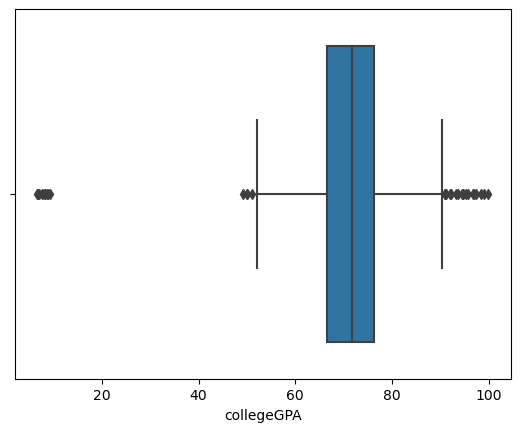

In [17]:
# Visualize the distribution of 'collegeGPA' using a boxplot

sns.boxplot(data = df,x='collegeGPA')

In [18]:
# Filter out rows with 'collegeGPA' less than or equal to 40

df = df[df['collegeGPA']>40]

In [19]:
df.shape

(2989, 24)

### Visualising English, Logical and Quant

Text(0.5, 1.0, 'Quant')

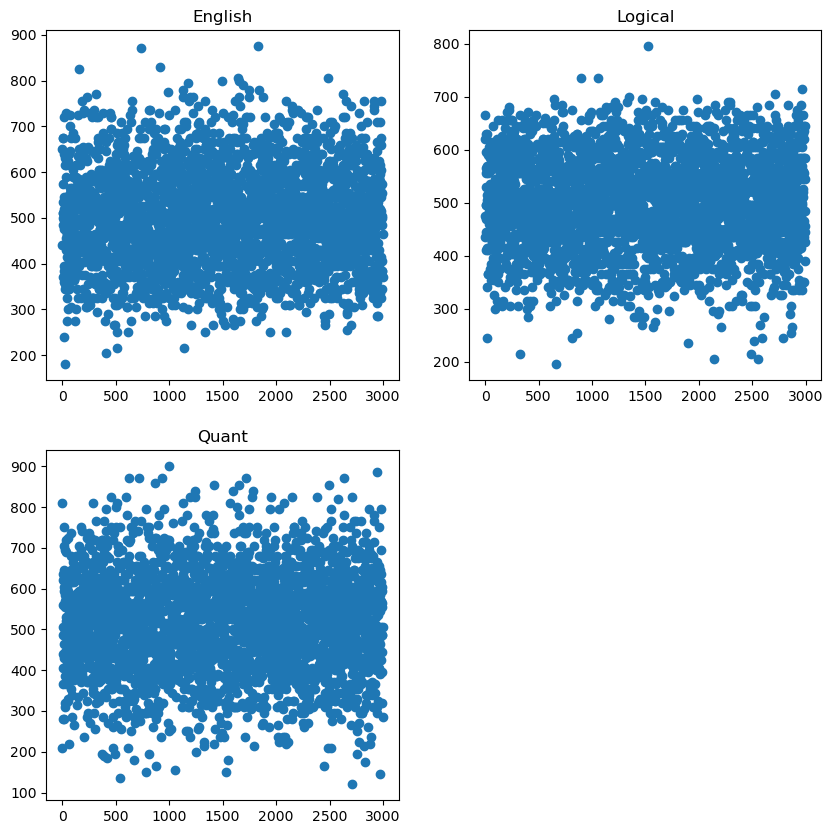

In [20]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(df.index,df.English)
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(df.index,df.Logical)
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(df.index,df.Quant)
plt.title('Quant')

In [21]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

Text(0.5, 1.0, 'MechanicalEngg')

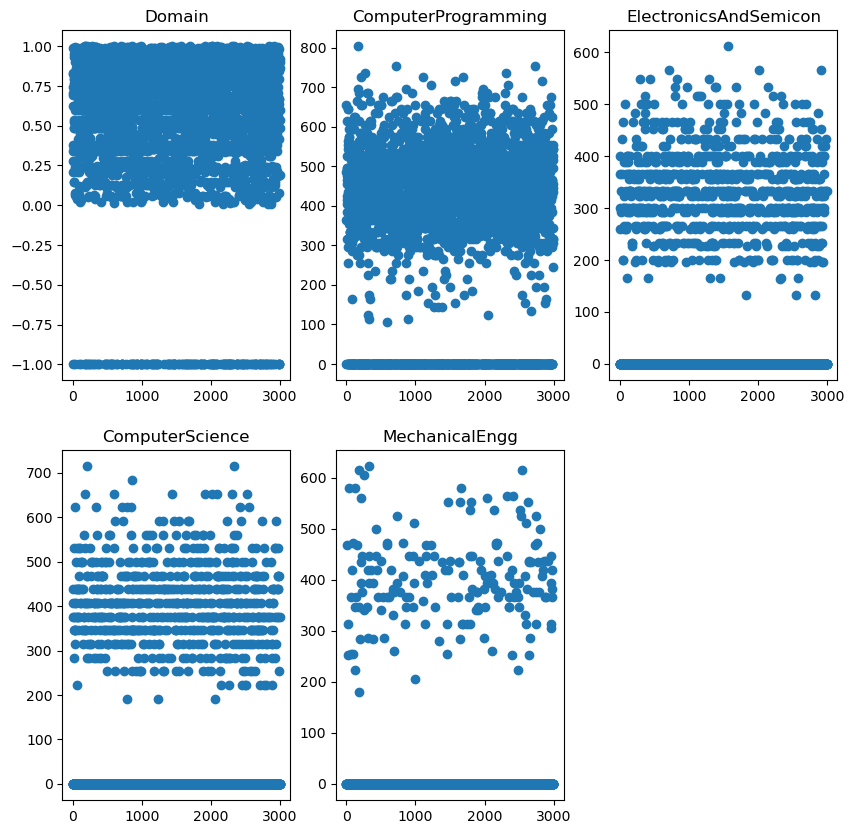

In [22]:
plt.figure(figsize = (10,10))
plt.subplot(2,3,1)
plt.scatter(df.index,df.Domain)
plt.title('Domain')

plt.subplot(2,3,2)
plt.scatter(df.index,df.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,3,3)
plt.scatter(df.index,df.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.subplot(2,3,4)
plt.scatter(df.index,df.ComputerScience)
plt.title('ComputerScience')

plt.subplot(2,3,5)
plt.scatter(df.index,df.MechanicalEngg)
plt.title('MechanicalEngg')


In [23]:
# Replace -1 values with NaN

df = df.replace(-1, np.nan)

## Fill null value with mean

In [24]:
cols_with_nan = [column for column in df.columns if df.isna().sum()[column] > 0]
for column in cols_with_nan:
    df[column] = df[column].fillna(df[column].mean())

# Data Visualization

In [25]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<AxesSubplot:xlabel='Gender', ylabel='count'>

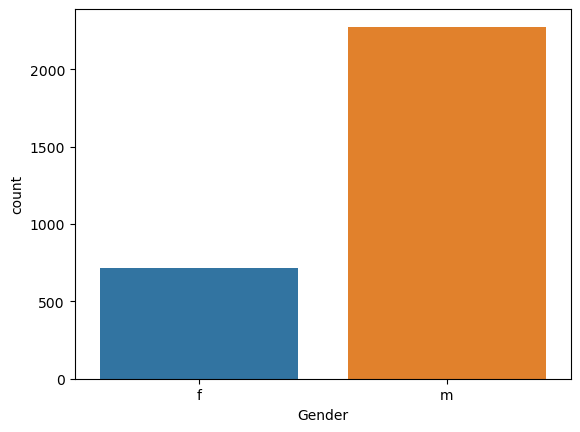

In [26]:
# Countplot for 'Gender'

sns.countplot(data = df , x= 'Gender')

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

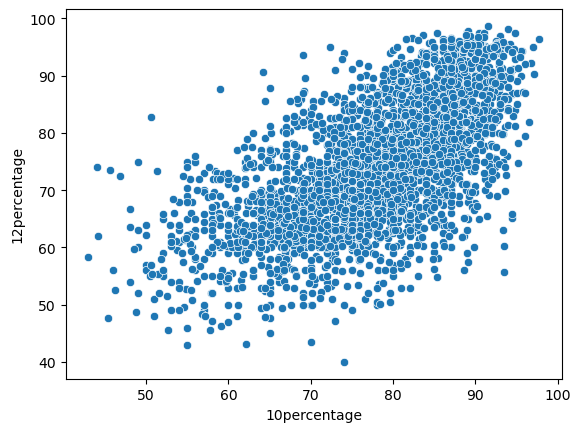

In [27]:
# Scatterplot for '10percentage' vs '12percentage'

sns.scatterplot(df,x='10percentage',y= '12percentage')

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

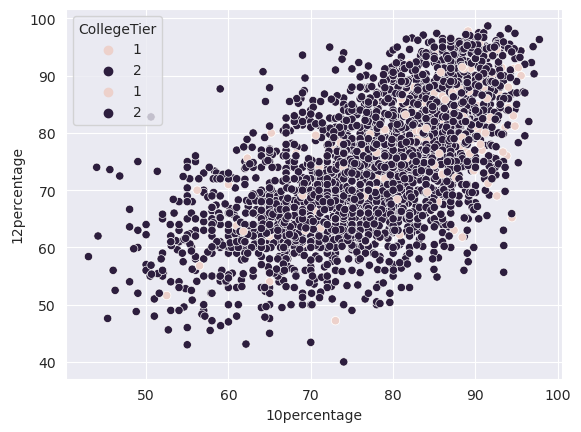

In [28]:
# Scatterplot for '10percentage' vs '12percentage' with hue as 'CollegeTier'
sns.set_style('darkgrid')
sns.scatterplot(df, x='10percentage', y='12percentage', hue=df.CollegeTier)
sns.set_style('darkgrid')
sns.scatterplot(df,x='10percentage',y= '12percentage',hue = df.CollegeTier)

In [29]:
#  10percentage can be dropped as 12percentage is related to it 

In [30]:
df.drop(columns = ['10percentage'],inplace =  True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'instrumentation and control engineering'),
  Text(1, 0, 'computer science & engineering'),
  Text(2, 0, 'electronics & telecommunications'),
  Text(3, 0, 'biotechnology'),
  Text(4, 0, 'mechanical engineering'),
  Text(5, 0, 'information technology'),
  Text(6, 0, 'electronics and communication engineering'),
  Text(7, 0, 'computer engineering'),
  Text(8, 0, 'computer application'),
  Text(9, 0, 'other'),
  Text(10, 0, 'electrical engineering'),
  Text(11, 0, 'electronics and electrical engineering'),
  Text(12, 0, 'information science engineering'),
  Text(13, 0, 'electronics & instrumentation eng'),
  Text(14, 0, 'electronics engineering'),
  Text(15, 0, 'electronics and instrumentation engineering'),
  Text(16, 0, 'civil engineering')])

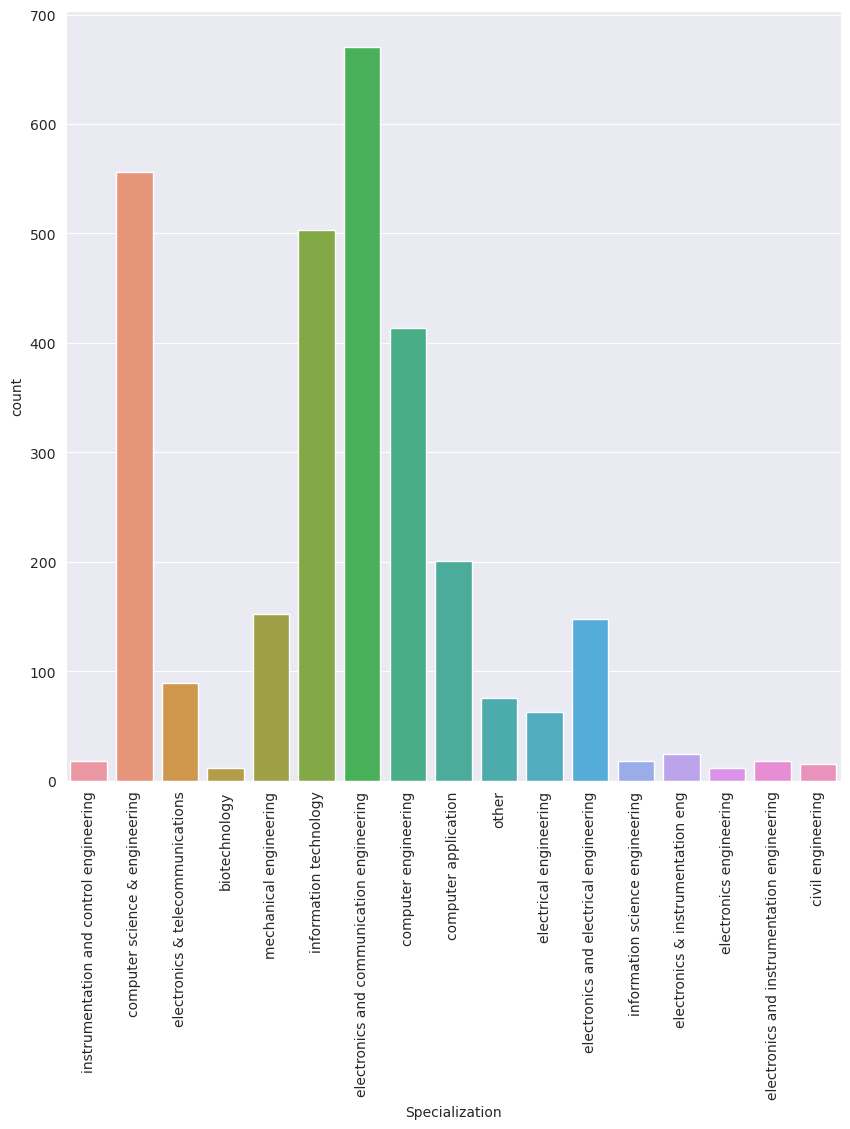

In [31]:
plt.figure(figsize = (10,10))
sns.countplot(df,x= 'Specialization')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'B.Tech/B.E.'),
  Text(1, 0, 'M.Tech./M.E.'),
  Text(2, 0, 'MCA'),
  Text(3, 0, 'M.Sc. (Tech.)')])

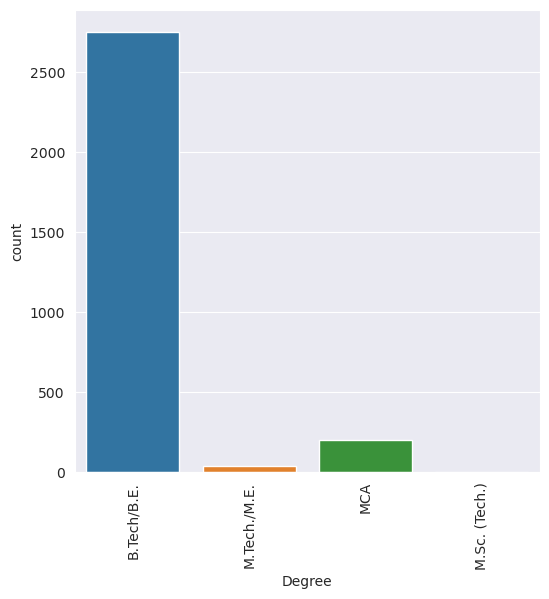

In [32]:
plt.figure(figsize = (6,6))
sns.countplot(df,x= 'Degree')
plt.xticks(rotation = 90)

In [33]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# plotting gpa vs salary

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

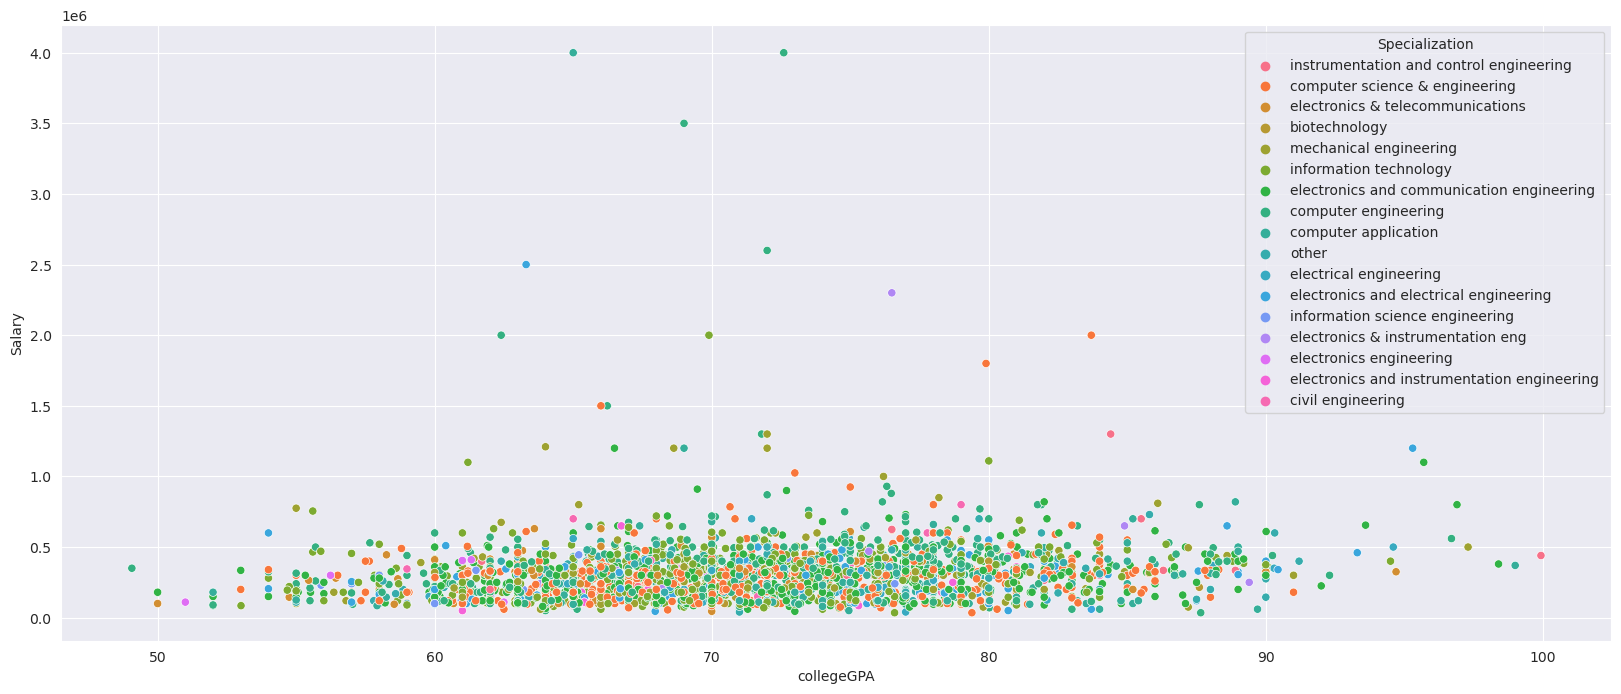

In [34]:
plt.figure(figsize = (20,8))
sns.scatterplot(df,x='collegeGPA',y= 'Salary', hue = 'Specialization')

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

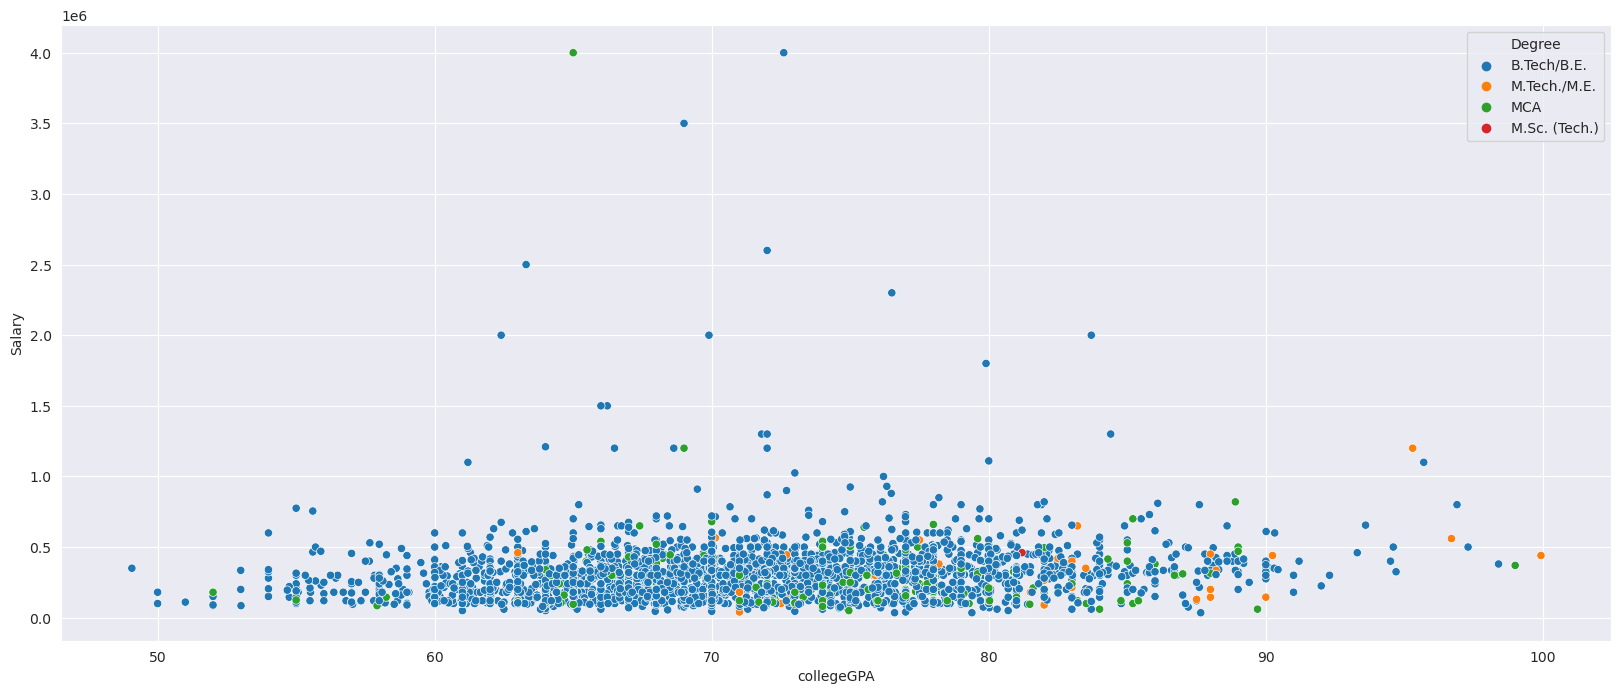

In [35]:
plt.figure(figsize = (20,8))
sns.scatterplot(df,x='collegeGPA',y= 'Salary', hue = 'Degree')

<AxesSubplot:>

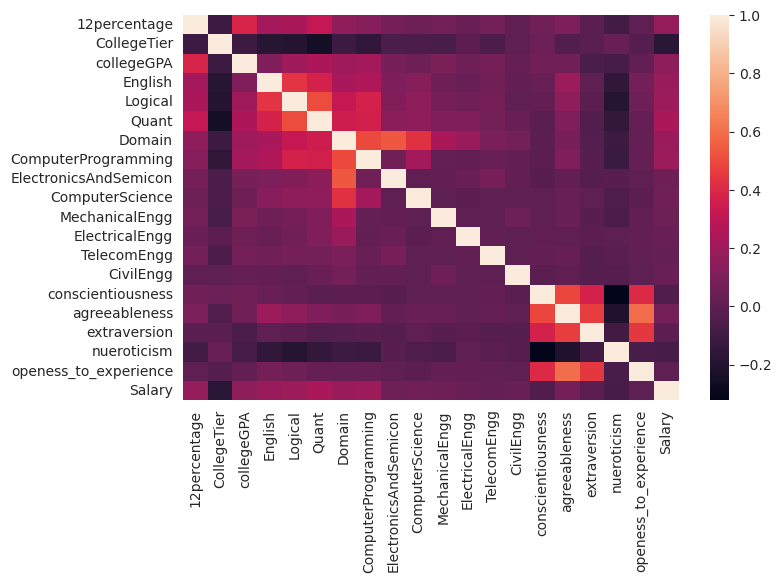

In [36]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr())

In [37]:
#sns.pairplot(df)

In [38]:
# Encode categorical variables using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.Degree = le.fit_transform(df.Degree)
df.Specialization = le.fit_transform(df.Specialization)

df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [39]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


# XGBoost

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor


In [41]:
# Prepare the data for training

x = df.drop('Salary', axis=1)
y = df['Salary']

sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

# Predicting x_test Data

In [43]:
predictions = xgb.predict(X_test)
diff = y_test - predictions

# Visualizing Difference

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Salary', ylabel='Density'>

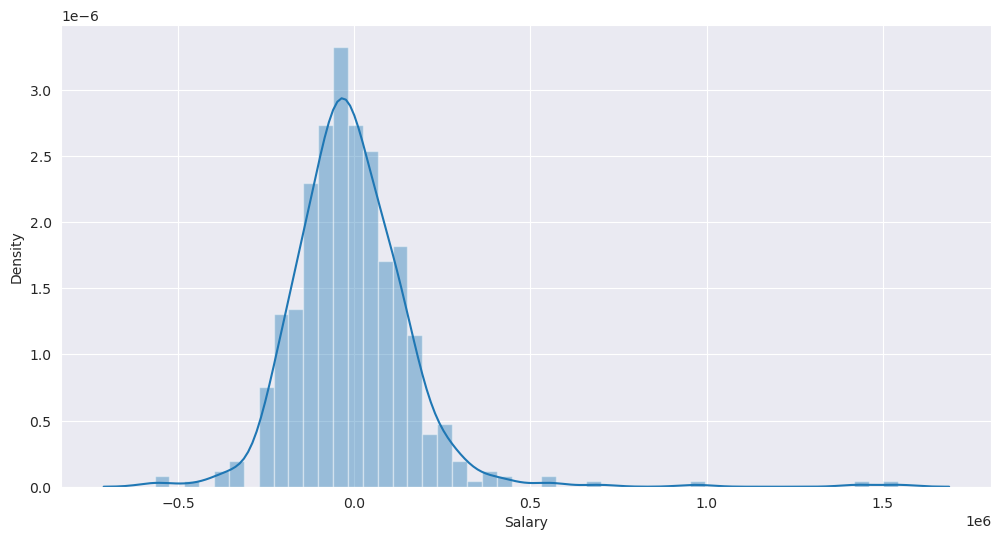

In [44]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

# Checking R2_score

In [45]:
xgb_r2_score = xgb.score(X_test, y_test)

print("XGBoost R2 Score: ", (xgb_r2_score))

XGBoost R2 Score:  0.09876532055075804
